In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
def Data(Name):
    df = pd.read_csv(Name)
    #Normalize: QM Check Urgent = 0, QM Check Needed = 1, None = 2, PSF = 3 and SF = 4 
    dfc = df.copy()
    
    for i in range(len(df)):
        if dfc['WebsitePriority'][i] == 'QM Check Urgent':
            dfc.loc[i,'WebsitePriority'] = 0
        if dfc['WebsitePriority'][i] == 'QM Check Needed':
            dfc.loc[i,'WebsitePriority'] = 1
        if dfc['WebsitePriority'][i] == 'None':
            dfc.loc[i,'WebsitePriority'] = 2
        if dfc['WebsitePriority'][i] == 'PSF':
            dfc.loc[i,'WebsitePriority'] = 3
        if dfc['WebsitePriority'][i] == 'SF':
            dfc.loc[i,'WebsitePriority'] = 4
    print('Normalizated...')
    New_df = dfc
    return New_df

Python tiene varias maneras de usar bases de datos, una muy practica es tomarla directamente del link, por lo que procedemos:


In [81]:
data = Data('TrainingSet.csv')

Normalizated...


In [82]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal lenght', 'petal width']
All_Features = ['URLCount','DP_Encoded', 'CrawlIssues', 'WebReviewDif','WebsitePriority'
                ,'ErrorCount', 'R2Time', 'TeamLeadSBQ', 'QMSBQ', 'CxPending'
               ,'CxComplete', 'TotalSBQ', 'Sent', 'Title', 'Brand'
               ,'MFR', 'BC', 'Color', 'Size', 'IPQ'
               ,'UC', 'Model', 'UPC', 'MPN', 'WebExtractionDif'
               ,'SloppyError', 'IncorrectVariant', 'NewEdgeCase', 'IncorrectGuidance', 'Other?'
               ,'Was it a PSF?', 'MXQA_Encoded',  'QM_Encoded', 'Month_Encoded'
               ,'R1Time']

X_test = data.loc[:, All_Features]
y_test = data.loc[:, 'Batch Status']

Escalamos(centrar y escalar) los datos, lo que hace que nuestros valores se encuentren entre 0-1, es muy importante hacer esto solamente sobre las caracteristicas


In [95]:
X_test['URLCount']

0       17
1      194
2       30
3       20
4       40
      ... 
127     25
128    151
129     20
130     40
131     20
Name: URLCount, Length: 132, dtype: int64

In [101]:
pca = PCA(n_components = 35) #primer cambio

principalComponents = pca.fit_transform(X_test)

X_reconstructed = pca.inverse_transform(principalComponents)

pca.fit(X_test)

eigenfaces = pca.components_.reshape((35, h, w))

NameError: name 'h' is not defined

In [74]:
targetDataframe = data[['Batch Status']] #df[['NOMBRE DE LA COLUMNA A CLASIFICAR']] TERCER cambio

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)


In [102]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =13)

columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5',
          'PC6', 'PC7', 'PC8', 'PC9','PC10',
          'PC11', 'PC12', 'PC13', 'PC14','PC15',
          'PC16', 'PC17', 'PC18', 'PC19','PC20',
          'PC21', 'PC22', 'PC23', 'PC24','PC25',
          'PC26', 'PC27', 'PC28', 'PC29','PC30',
          'PC31', 'PC32', 'PC33', 'PC34','PC35'] #cuarto cambio
pca.explained_variance_ratio_

array([6.08940598e-01, 2.12326172e-01, 9.26625224e-02, 5.74260281e-02,
       2.16566717e-02, 3.35282528e-03, 1.38278830e-03, 1.06515001e-03,
       2.98994465e-04, 2.19893506e-04, 1.25849541e-04, 1.17670113e-04,
       7.23961977e-05, 5.63016640e-05, 5.54870798e-05, 4.35150554e-05,
       3.59121440e-05, 3.00140367e-05, 2.44526832e-05, 2.30736720e-05,
       1.61211699e-05, 1.40366999e-05, 1.25408416e-05, 9.46420365e-06,
       7.04875320e-06, 6.12840272e-06, 4.76832507e-06, 4.70031566e-06,
       3.81746186e-06, 2.21750480e-06, 1.47407666e-06, 1.05954741e-06,
       3.06448781e-07, 3.33409998e-33, 3.33409998e-33])

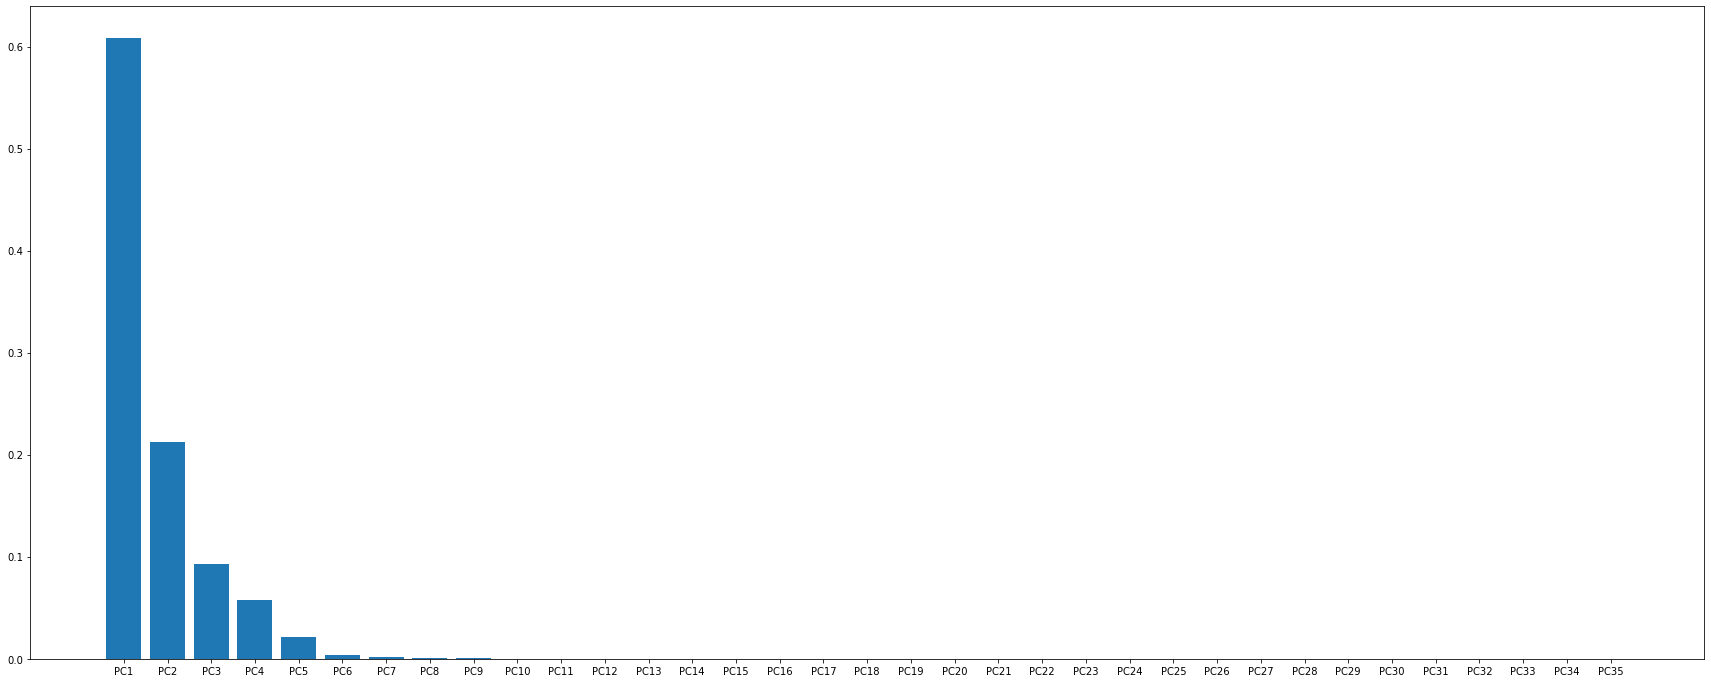

In [103]:
fig = plt.figure(figsize = (30,12))
a = fig.add_subplot(1,1,1) 
a.bar(x= range(1,36), height = pca.explained_variance_ratio_, tick_label=columns)
a.xlabel = "Principal Component"

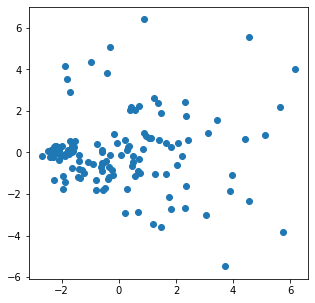

In [50]:
fig = plt.figure(figsize = (5,5))
a2 = fig.add_subplot(1,1,1) 
a2.scatter(principalDataframe.PC1, principalDataframe.PC2)

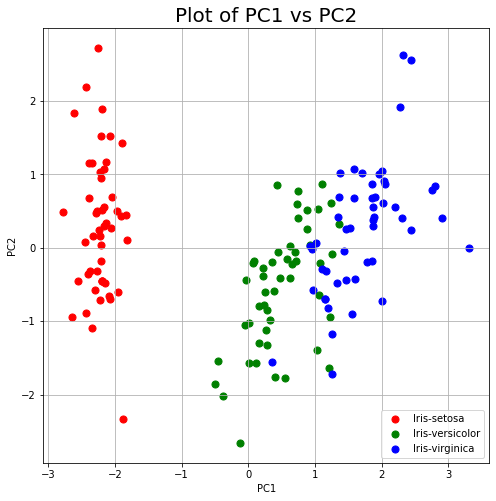

In [45]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['target'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [49]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])